In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from htbayes import load_data, BEST
import pymc3 as pm

In [3]:
data = load_data('bandoro-microbiome.csv')
data.head()

,Date,Sample,% GFP,Normalized % GFP,Replicate
0,09.03.2016,Water,15.90,98.148148,1
1,09.03.2016,Water,16.50,101.851852,2
2,08.31.2016,Water,26.00,108.559499,3
3,08.31.2016,Water,21.90,91.440501,4
4,09.03.2016,Salmonella typhimurium,1.84,11.358025,1


In [4]:
set(data['Sample'])

{'Akkermansia muciniphilia ',
 'Bacteroides fragilis ',
 'Bacteroides ovatus ',
 'Bacteroides thetaiotaomicron ',
 'Bacteroides vulgatus',
 'Clostridium scindens ',
 'Escherichia coli BC15',
 'Escherichia coli K12',
 'Eubacterium rectale ',
 'Parabacteroides distastonis ',
 'Pseudomonas aeruginosa ',
 'Rumincoccus obeum ',
 'Salmonella typhimurium ',
 'Water'}

In [5]:
data['Normalized % GFP'].values.shape

(56,)

In [6]:
b = BEST(data, sample_col='Sample', output_col='Normalized % GFP', baseline_name='Water')

In [7]:
b.fit(n_steps=50000)

Applied log-transform to upper and added transformed upper_log_ to model.
INFO:pymc3:Applied log-transform to upper and added transformed upper_log_ to model.
Applied log-transform to nu_minus_one and added transformed nu_minus_one_log_ to model.
INFO:pymc3:Applied log-transform to nu_minus_one and added transformed nu_minus_one_log_ to model.
Applied interval-transform to fold and added transformed fold_interval_ to model.
INFO:pymc3:Applied interval-transform to fold and added transformed fold_interval_ to model.
Applied log-transform to sigma and added transformed sigma_log_ to model.
INFO:pymc3:Applied log-transform to sigma and added transformed sigma_log_ to model.


Iteration 0 [0%]: ELBO = -1746.01
Iteration 5000 [10%]: Average ELBO = -1711.66
Iteration 10000 [20%]: Average ELBO = -388.87
Iteration 15000 [30%]: Average ELBO = -324.28
Iteration 20000 [40%]: Average ELBO = -300.71
Iteration 25000 [50%]: Average ELBO = -287.29
Iteration 30000 [60%]: Average ELBO = -281.49
Iteration 35000 [70%]: Average ELBO = -278.99
Iteration 40000 [80%]: Average ELBO = -278.14
Iteration 45000 [90%]: Average ELBO = -277.91
Finished [100%]: Average ELBO = -277.52


100%|██████████| 2000/2000 [00:35<00:00, 56.29it/s]


(<matplotlib.figure.Figure at 0x113c37c50>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1168d1320>)

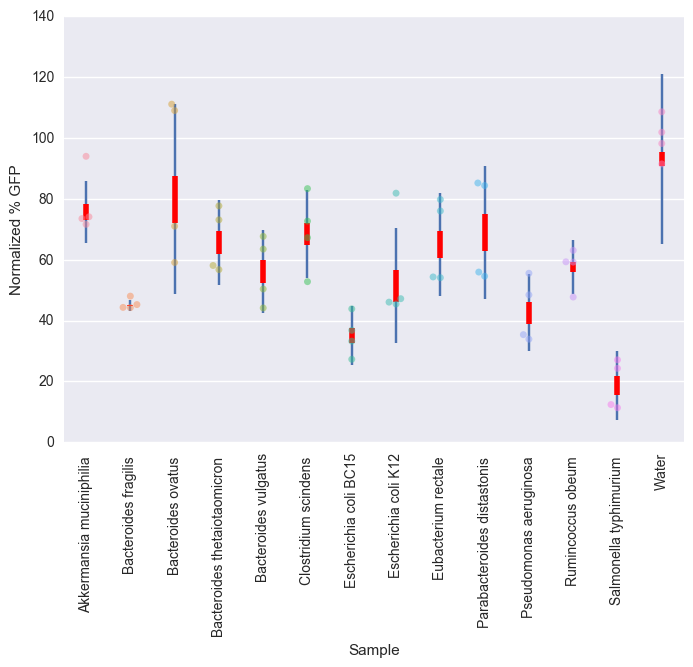

In [8]:
b.plot_posterior(rotate_xticks=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ae59b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1191fb278>]], dtype=object)

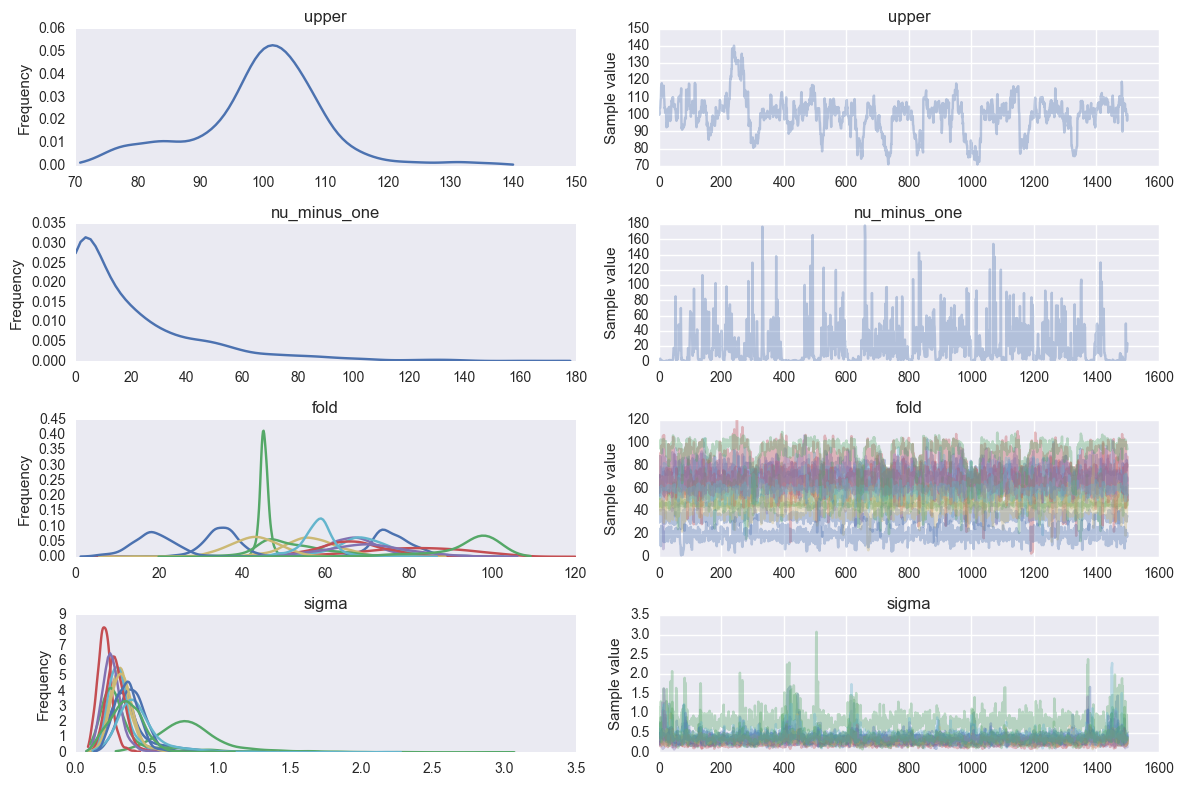

In [9]:
pm.traceplot(b.trace[500:])